# model GB2

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
##### function that reads the value of the total contribution in a determined line
def read_value(line):
    return float(line.split('|')[-1].split('+/-')[0])

def protonation(line):
    line_t = line
    line_t = line_t.replace('HID', 'HIS')
    line_t = line_t.replace('HIE', 'HIS')
    line_t = line_t.replace('HIP', 'HIS')
    line_t = line_t.replace('ASH', 'ASP')
    line_t = line_t.replace('GLH', 'GLU')
    line_t = line_t.replace('CYX', 'CYS')
    return line_t


#### function to find the contribution of a determined residue 
def value_finder(residue, file):
    # this will return the first line where the residue show up
    for line in file:
        if residue in protonation(line):
            return read_value(line)
    

In [3]:
### fixing the residue numbers
def res_shift(residue, shift):
    o_res = str(int(residue.split(' ')[-1]))
    s_res = str(int(residue.split(' ')[-1]) + shift)
    res = residue.replace(o_res,s_res)
    return res

### changing from three letters to one letter code
def tlc2olc(resname):
    dic = {'ALA': 'A', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E', 'PHE': 'F',
           'GLY': 'G', 'HIS': 'H', 'ILE': 'I', 'LYS': 'K', 'LEU': 'L',
           'MET': 'M', 'ASN': 'N', 'PRO': 'P', 'GLN': 'Q', 'ARG': 'R',
           'SER': 'S', 'THR': 'T', 'VAL': 'V', 'TRP': 'W', 'TYR': 'Y'
          }
    restype = resname.split(' ')[0]
    resnumber = resname.split(' ')[-1]
    return dic[restype] + resnumber
tlc2olc('HIS 42')   

'H42'

In [4]:
def file_processing(lines, th1, div_number):
    
    e_values = []
    pairs = []
    res_1 = []
    res_2 = []
    number_1 = []
    number_2 = []
    for i in range(len(lines)):
#     print(i)
        try: 
            e_values.append(read_value(lines[i]))
            pairs.append(lines[i][:20])
            res_1.append(lines[i][:7])
            res_2.append(lines[i][10:17])
            number_1.append(int(lines[i][4:7]))
            number_2.append(int(lines[i][14:17]))
        except:
            continue
            
    e_values = np.array(e_values)
    pairs = np.array(pairs)
    res_1 = np.array(res_1)
    res_2 = np.array(res_2)
    number_1 = np.array(number_1)
    number_2 = np.array(number_2)
###### filter 1 by energy threshold
    pairs = pairs[e_values < th1]
    res_1 = res_1[e_values < th1]
    res_2 = res_2[e_values < th1]
    number_1 = number_1[e_values < th1]
    number_2 = number_2[e_values < th1]
    e_values = e_values[e_values < th1]
##### filter 2 only residues of the first chain in the first position
    res_1 = res_1[number_1 < div_number]
    res_2 = res_2[number_1 < div_number]
    e_values = e_values[number_1 < div_number]
    pairs = pairs[number_1 < div_number]
    number_2 = number_2[number_1 < div_number]
    number_1 = number_1[number_1 < div_number]
#### filter 3 only residues of the second chain in the second position
    res_1 = res_1[number_2 >= div_number]
    res_2 = res_2[number_2 >= div_number]
    e_values = e_values[number_2 >= div_number]
    pairs = pairs[number_2 >= div_number]
    number_1 = number_1[number_2 >= div_number]
    number_2 = number_2[number_2 >= div_number]
    return pairs, e_values, res_1, res_2, number_1, number_2

In [5]:
def files_processing(lines_r, th1, div_number, shift1, shift2):
    
    e_values = []
    pairs = []
    res_1 = []
    res_2 = []
    number_1 = []
    number_2 = []
    lines = lines_r[0]
    e_vl = []
    min_eval = []
    for i in range(len(lines)):
        e_vl = []
        try:
            for j in range(len(lines_r)):
                e_vl.append(read_value(lines_r[j][i]))
            e_values.append(e_vl)
            min_eval.append(min(e_vl))
            pairs.append(lines[i][:20])
            res_1.append(lines[i][:7])
            res_2.append(lines[i][10:17])
            number_1.append(int(lines[i][4:7]))
            number_2.append(int(lines[i][14:17]))
        except:
            continue
            
    e_values = np.array(e_values)
    pairs = np.array(pairs)
    res_1 = np.array(res_1)
    res_2 = np.array(res_2)
    number_1 = np.array(number_1)
    number_2 = np.array(number_2)
    min_eval = np.array(min_eval)
###### filter 1 by energy threshold
    
    pairs = pairs[min_eval < th1]
    res_1 = res_1[min_eval < th1]
    res_2 = res_2[min_eval < th1]
    number_1 = number_1[min_eval < th1]
    number_2 = number_2[min_eval < th1]
    e_values = e_values[min_eval < th1]
##### filter 2 only residues of the first chain in the first position

    res_1 = res_1[number_1 < div_number]
    res_2 = res_2[number_1 < div_number]
    e_values = e_values[number_1 < div_number]
    pairs = pairs[number_1 < div_number]
    number_2 = number_2[number_1 < div_number]
    number_1 = number_1[number_1 < div_number]
#### filter 3 only residues of the second chain in the second position

    res_1 = res_1[number_2 >= div_number]
    res_2 = res_2[number_2 >= div_number]
    e_values = e_values[number_2 >= div_number]
    pairs = pairs[number_2 >= div_number]
    number_1 = number_1[number_2 >= div_number]
    number_2 = number_2[number_2 >= div_number]
#     for i in range(len(number_2)):
#         number_2[i] = number_2[i] - div_number + 1
    for i in range(len(res_1)):
        res_1[i] = tlc2olc(res_shift(protonation(res_1[i]), shift1))
        res_2[i] = tlc2olc(res_shift(protonation(res_2[i]), shift2 - div_number + 1))
        pairs[i] = res_1[i] + '-' + res_2[i]
    
    return pairs, e_values, res_1, res_2, number_1, number_2

In [6]:
file1 = open('../IL2-HAR_IAR_COMPLEXES/IL2-HAR/productive/analysis/MMGBSA_amber_19/beta-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file2 = open('../IL2-HAR_IAR_COMPLEXES/IL2-HAR/productive_r1/analysis/MMGBSA_amber_19/beta-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file3 = open('../IL2-HAR_IAR_COMPLEXES/IL2-IAR/productive/analysis/MMGBSA_amber_19/beta-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file4 = open('../IL2-HAR_IAR_COMPLEXES/IL2-IAR/productive_r1/analysis/MMGBSA_amber_19/beta-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')

il2HAR_BG_r0_gb2 = file1.readlines()[10:]
il2HAR_BG_r1_gb2 = file2.readlines()[10:]
il2IAR_BG_r0_gb2 = file3.readlines()[10:]
il2IAR_BG_r1_gb2 = file4.readlines()[10:]

In [7]:
file5 = open('../IL2-HAR_IAR_COMPLEXES/IL2-HAR/productive/analysis/MMGBSA_amber_19/il2-beta_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file6 = open('../IL2-HAR_IAR_COMPLEXES/IL2-HAR/productive_r1/analysis/MMGBSA_amber_19/il2-beta_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file7 = open('../IL2-HAR_IAR_COMPLEXES/IL2-IAR/productive/analysis/MMGBSA_amber_19/il2-beta_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file8 = open('../IL2-HAR_IAR_COMPLEXES/IL2-IAR/productive_r1/analysis/MMGBSA_amber_19/il2-beta_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')

il2HAR_IL2B_r0_gb2 = file5.readlines()[10:]
il2HAR_IL2B_r1_gb2 = file6.readlines()[10:]
il2IAR_IL2B_r0_gb2 = file7.readlines()[10:]
il2IAR_IL2B_r1_gb2 = file8.readlines()[10:]

In [8]:
file9 = open('../IL2-HAR_IAR_COMPLEXES/IL2-HAR/productive/analysis/MMGBSA_amber_19/il2-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file10 = open('../IL2-HAR_IAR_COMPLEXES/IL2-HAR/productive_r1/analysis/MMGBSA_amber_19/il2-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file11 = open('../IL2-HAR_IAR_COMPLEXES/IL2-IAR/productive/analysis/MMGBSA_amber_19/il2-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file12 = open('../IL2-HAR_IAR_COMPLEXES/IL2-IAR/productive_r1/analysis/MMGBSA_amber_19/il2-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')

il2HAR_IL2G_r0_gb2 = file9.readlines()[10:]
il2HAR_IL2G_r1_gb2 = file10.readlines()[10:]
il2IAR_IL2G_r0_gb2 = file11.readlines()[10:]
il2IAR_IL2G_r1_gb2 = file12.readlines()[10:]

In [9]:
file13 = open('../IL15-HAR_IAR_COMPLEXES/IL15-HAR/productive/analysis/MMGBSA_amber_19/beta-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file14 = open('../IL15-HAR_IAR_COMPLEXES/IL15-HAR/productive_r1/analysis/MMGBSA_amber_19/beta-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file15 = open('../IL15-HAR_IAR_COMPLEXES/IL15-IAR/productive/analysis/MMGBSA_amber_19/beta-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file16 = open('../IL15-HAR_IAR_COMPLEXES/IL15-IAR/productive_r1/analysis/MMGBSA_amber_19/beta-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')

il15HAR_BG_r0_gb2 = file13.readlines()[10:]
il15HAR_BG_r1_gb2 = file14.readlines()[10:]
il15IAR_BG_r0_gb2 = file15.readlines()[10:]
il15IAR_BG_r1_gb2 = file16.readlines()[10:]

In [10]:
file17 = open('../IL15-HAR_IAR_COMPLEXES/IL15-HAR/productive/analysis/MMGBSA_amber_19/il15-beta_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file18 = open('../IL15-HAR_IAR_COMPLEXES/IL15-HAR/productive_r1/analysis/MMGBSA_amber_19/il15-beta_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file19 = open('../IL15-HAR_IAR_COMPLEXES/IL15-IAR/productive/analysis/MMGBSA_amber_19/il15-beta_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file20 = open('../IL15-HAR_IAR_COMPLEXES/IL15-IAR/productive_r1/analysis/MMGBSA_amber_19/il15-beta_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')

il15HAR_IL15B_r0_gb2 = file17.readlines()[10:]
il15HAR_IL15B_r1_gb2 = file18.readlines()[10:]
il15IAR_IL15B_r0_gb2 = file19.readlines()[10:]
il15IAR_IL15B_r1_gb2 = file20.readlines()[10:]

In [11]:
file21 = open('../IL15-HAR_IAR_COMPLEXES/IL15-HAR/productive/analysis/MMGBSA_amber_19/il15-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file22 = open('../IL15-HAR_IAR_COMPLEXES/IL15-HAR/productive_r1/analysis/MMGBSA_amber_19/il15-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file23 = open('../IL15-HAR_IAR_COMPLEXES/IL15-IAR/productive/analysis/MMGBSA_amber_19/il15-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')
file24 = open('../IL15-HAR_IAR_COMPLEXES/IL15-IAR/productive_r1/analysis/MMGBSA_amber_19/il15-gamma_gb2/pair_wise/FINAL_DECOMP_MMPBSA.dat','r')

il15HAR_IL15G_r0_gb2 = file21.readlines()[10:]
il15HAR_IL15G_r1_gb2 = file22.readlines()[10:]
il15IAR_IL15G_r0_gb2 = file23.readlines()[10:]
il15IAR_IL15G_r1_gb2 = file24.readlines()[10:]

In [12]:
B2G = ['ARG 132', 'HIS 133', 'LEU 134', 'GLU 135', 'LEU 153', 'THR 154', 'LEU 155', 
                 'LYS 156', 'GLN 157', 'GLN 159', 'TRP 161', 'LEU 164', 'GLU 165', 
                 'THR 166', 'LEU 182']
G2B = ['LEU 112', 'GLN 116', 'GLU 131', 'GLN 147', 'VAL 149', 'ASP 150', 'TYR 151',
                 'ARG 152', 'PHE 155', 'SER 156', 'PRO 158', 'SER 159', 'LYS 154', 
                 'TYR 166', 'PRO 176']


IL22B = ['LEU  10', 'GLN  11', 'GLU  13', 'HIS  14', 'LEU  17', 'ASP  18', 'MET  21',
                 'ARG  79', 'ASP  82', 'LEU  83', 'ASN  86', 'VAL  89', 'ILE  90', 
                 'LEU  92', 'GLU  93']
B2IL2 = ['ARG  10', 'ARG  36', 'ASP  63', 'SER  64', 'GLN  65', 'THR  68', 'THR  69', 
                 'VAL  70', 'LYS  94', 'HIS 128', 'TYR 129', 'HIS 133']


IL22G = ['LEU  16', 'LYS  47', 'GLU 108', 'THR 121', 'GLN 124', 'SER 125', 'ILE 127', 
                 'SER 128', 'THR 131']
G2IL2 = ['LYS  39', 'ASN  40', 'TYR  72', 'LYS  94', 'TYR 151', 'PRO 176', 'LEU 177']


IL152B = ['ASP  10', 'ASP  58', 'ASP  63', 'GLU  66', 'ASN  67', 'ILE  70', 'LEU  71']
B2IL15 = ['ARG  36', 'ARG  37', 'ARG  38', 'SER  64', 'THR  68', 'THR  69', 'VAL  70', 
                'ASP  71', 'HIS 128', 'TYR 129']


IL152G = ['VAL   5', 'ILE   8', 'GLU  30', 'SER  31', 'ASP  32', 'VAL  33', 'HIS  34', 
                'PRO  35', 'HIS 107', 'GLN 110', 'MET 111', 'ILE 113']
G2IL15 = ['LYS  39', 'ASN  40', 'SER  41', 'GLN  73', 'THR  74', 'LYS  94', 'GLN  96', 
          'PRO 176', 'LEU 177', 'CYS 178', 'SER 180']

# B2G

In [13]:
B2G_il2har_r0_gb2 = []
B2G_il2har_r1_gb2 = []
B2G_il2iar_r0_gb2 = []
B2G_il2iar_r1_gb2 = []

G2B_il2har_r0_gb2 = []
G2B_il2har_r1_gb2 = []
G2B_il2iar_r0_gb2 = []
G2B_il2iar_r1_gb2 = []


for res in B2G:
    B2G_il2har_r0_gb2.append(value_finder(res, il2HAR_BG_r0_gb2))
    B2G_il2har_r1_gb2.append(value_finder(res, il2HAR_BG_r1_gb2))
    B2G_il2iar_r0_gb2.append(value_finder(res, il2IAR_BG_r0_gb2))
    B2G_il2iar_r1_gb2.append(value_finder(res, il2IAR_BG_r1_gb2))
    
for res in G2B:
    G2B_il2har_r0_gb2.append(value_finder(res, il2HAR_BG_r0_gb2))
    G2B_il2har_r1_gb2.append(value_finder(res, il2HAR_BG_r1_gb2))
    G2B_il2iar_r0_gb2.append(value_finder(res, il2IAR_BG_r0_gb2))
    G2B_il2iar_r1_gb2.append(value_finder(res, il2IAR_BG_r1_gb2))
    
    
B2G_H_gb2 = list(np.transpose([B2G_il2har_r0_gb2, B2G_il2har_r1_gb2]))
B2G_I_gb2 = list(np.transpose([B2G_il2iar_r0_gb2, B2G_il2iar_r1_gb2]))

G2B_H_gb2 = list(np.transpose([G2B_il2har_r0_gb2, G2B_il2har_r1_gb2]))
G2B_I_gb2 = list(np.transpose([G2B_il2iar_r0_gb2, G2B_il2iar_r1_gb2]))

In [14]:
IL22B_il2har_r0_gb2 = []
IL22B_il2har_r1_gb2 = []
IL22B_il2iar_r0_gb2 = []
IL22B_il2iar_r1_gb2 = []

B2IL2_il2har_r0_gb2 = []
B2IL2_il2har_r1_gb2 = []
B2IL2_il2iar_r0_gb2 = []
B2IL2_il2iar_r1_gb2 = []


for res in IL22B:
    IL22B_il2har_r0_gb2.append(value_finder(res, il2HAR_IL2B_r0_gb2))
    IL22B_il2har_r1_gb2.append(value_finder(res, il2HAR_IL2B_r1_gb2))
    IL22B_il2iar_r0_gb2.append(value_finder(res, il2IAR_IL2B_r0_gb2))
    IL22B_il2iar_r1_gb2.append(value_finder(res, il2IAR_IL2B_r1_gb2))
    
for res in B2IL2:
    B2IL2_il2har_r0_gb2.append(value_finder(res, il2HAR_IL2B_r0_gb2))
    B2IL2_il2har_r1_gb2.append(value_finder(res, il2HAR_IL2B_r1_gb2))
    B2IL2_il2iar_r0_gb2.append(value_finder(res, il2IAR_IL2B_r0_gb2))
    B2IL2_il2iar_r1_gb2.append(value_finder(res, il2IAR_IL2B_r1_gb2))
    
    
IL22B_H_gb2 = list(np.transpose([IL22B_il2har_r0_gb2, IL22B_il2har_r1_gb2]))
IL22B_I_gb2 = list(np.transpose([IL22B_il2iar_r0_gb2, IL22B_il2iar_r1_gb2]))

B2IL2_H_gb2 = list(np.transpose([B2IL2_il2har_r0_gb2, B2IL2_il2har_r1_gb2]))
B2IL2_I_gb2 = list(np.transpose([B2IL2_il2iar_r0_gb2, B2IL2_il2iar_r1_gb2]))

In [15]:
IL22G_il2har_r0_gb2 = []
IL22G_il2har_r1_gb2 = []
IL22G_il2iar_r0_gb2 = []
IL22G_il2iar_r1_gb2 = []

G2IL2_il2har_r0_gb2 = []
G2IL2_il2har_r1_gb2 = []
G2IL2_il2iar_r0_gb2 = []
G2IL2_il2iar_r1_gb2 = []


for res in IL22G:
    IL22G_il2har_r0_gb2.append(value_finder(res, il2HAR_IL2G_r0_gb2))
    IL22G_il2har_r1_gb2.append(value_finder(res, il2HAR_IL2G_r1_gb2))
    IL22G_il2iar_r0_gb2.append(value_finder(res, il2IAR_IL2G_r0_gb2))
    IL22G_il2iar_r1_gb2.append(value_finder(res, il2IAR_IL2G_r1_gb2))
    
for res in G2IL2:
    G2IL2_il2har_r0_gb2.append(value_finder(res, il2HAR_IL2G_r0_gb2))
    G2IL2_il2har_r1_gb2.append(value_finder(res, il2HAR_IL2G_r1_gb2))
    G2IL2_il2iar_r0_gb2.append(value_finder(res, il2IAR_IL2G_r0_gb2))
    G2IL2_il2iar_r1_gb2.append(value_finder(res, il2IAR_IL2G_r1_gb2))
    
    
IL22G_H_gb2 = list(np.transpose([IL22G_il2har_r0_gb2, IL22G_il2har_r1_gb2]))
IL22G_I_gb2 = list(np.transpose([IL22G_il2iar_r0_gb2, IL22G_il2iar_r1_gb2]))

G2IL2_H_gb2 = list(np.transpose([G2IL2_il2har_r0_gb2, G2IL2_il2har_r1_gb2]))
G2IL2_I_gb2 = list(np.transpose([G2IL2_il2iar_r0_gb2, G2IL2_il2iar_r1_gb2]))

In [16]:
B2G_il15har_r0_gb2 = []
B2G_il15har_r1_gb2 = []
B2G_il15iar_r0_gb2 = []
B2G_il15iar_r1_gb2 = []

G2B_il15har_r0_gb2 = []
G2B_il15har_r1_gb2 = []
G2B_il15iar_r0_gb2 = []
G2B_il15iar_r1_gb2 = []


for res in B2G:
    B2G_il15har_r0_gb2.append(value_finder(res, il15HAR_BG_r0_gb2))
    B2G_il15har_r1_gb2.append(value_finder(res, il15HAR_BG_r1_gb2))
    B2G_il15iar_r0_gb2.append(value_finder(res, il15IAR_BG_r0_gb2))
    B2G_il15iar_r1_gb2.append(value_finder(res, il15IAR_BG_r1_gb2))
    
for res in G2B:
    G2B_il15har_r0_gb2.append(value_finder(res, il15HAR_BG_r0_gb2))
    G2B_il15har_r1_gb2.append(value_finder(res, il15HAR_BG_r1_gb2))
    G2B_il15iar_r0_gb2.append(value_finder(res, il15IAR_BG_r0_gb2))
    G2B_il15iar_r1_gb2.append(value_finder(res, il15IAR_BG_r1_gb2))
    
    
B2G_H15_gb2 = list(np.transpose([B2G_il15har_r0_gb2, B2G_il15har_r1_gb2]))
B2G_I15_gb2 = list(np.transpose([B2G_il15iar_r0_gb2, B2G_il15iar_r1_gb2]))

G2B_H15_gb2 = list(np.transpose([G2B_il15har_r0_gb2, G2B_il15har_r1_gb2]))
G2B_I15_gb2 = list(np.transpose([G2B_il15iar_r0_gb2, G2B_il15iar_r1_gb2]))

In [17]:
IL152B_il15har_r0_gb2 = []
IL152B_il15har_r1_gb2 = []
IL152B_il15iar_r0_gb2 = []
IL152B_il15iar_r1_gb2 = []

B2IL15_il15har_r0_gb2 = []
B2IL15_il15har_r1_gb2 = []
B2IL15_il15iar_r0_gb2 = []
B2IL15_il15iar_r1_gb2 = []


for res in IL152B:
    IL152B_il15har_r0_gb2.append(value_finder(res, il15HAR_IL15B_r0_gb2))
    IL152B_il15har_r1_gb2.append(value_finder(res, il15HAR_IL15B_r1_gb2))
    IL152B_il15iar_r0_gb2.append(value_finder(res, il15IAR_IL15B_r0_gb2))
    IL152B_il15iar_r1_gb2.append(value_finder(res, il15IAR_IL15B_r1_gb2))
    
for res in B2IL15:
    B2IL15_il15har_r0_gb2.append(value_finder(res, il15HAR_IL15B_r0_gb2))
    B2IL15_il15har_r1_gb2.append(value_finder(res, il15HAR_IL15B_r1_gb2))
    B2IL15_il15iar_r0_gb2.append(value_finder(res, il15IAR_IL15B_r0_gb2))
    B2IL15_il15iar_r1_gb2.append(value_finder(res, il15IAR_IL15B_r1_gb2))
    
    
IL152B_H_gb2 = list(np.transpose([IL152B_il15har_r0_gb2, IL152B_il15har_r1_gb2]))
IL152B_I_gb2 = list(np.transpose([IL152B_il15iar_r0_gb2, IL152B_il15iar_r1_gb2]))

B2IL15_H_gb2 = list(np.transpose([B2IL15_il15har_r0_gb2, B2IL15_il15har_r1_gb2]))
B2IL15_I_gb2 = list(np.transpose([B2IL15_il15iar_r0_gb2, B2IL15_il15iar_r1_gb2]))

In [18]:
IL152G_il15har_r0_gb2 = []
IL152G_il15har_r1_gb2 = []
IL152G_il15iar_r0_gb2 = []
IL152G_il15iar_r1_gb2 = []

G2IL15_il15har_r0_gb2 = []
G2IL15_il15har_r1_gb2 = []
G2IL15_il15iar_r0_gb2 = []
G2IL15_il15iar_r1_gb2 = []


for res in IL152G:
    IL152G_il15har_r0_gb2.append(value_finder(res, il15HAR_IL15G_r0_gb2))
    IL152G_il15har_r1_gb2.append(value_finder(res, il15HAR_IL15G_r1_gb2))
    IL152G_il15iar_r0_gb2.append(value_finder(res, il15IAR_IL15G_r0_gb2))
    IL152G_il15iar_r1_gb2.append(value_finder(res, il15IAR_IL15G_r1_gb2))
    
for res in G2IL15:
    G2IL15_il15har_r0_gb2.append(value_finder(res, il15HAR_IL15G_r0_gb2))
    G2IL15_il15har_r1_gb2.append(value_finder(res, il15HAR_IL15G_r1_gb2))
    G2IL15_il15iar_r0_gb2.append(value_finder(res, il15IAR_IL15G_r0_gb2))
    G2IL15_il15iar_r1_gb2.append(value_finder(res, il15IAR_IL15G_r1_gb2))
    
    
IL152G_H_gb2 = list(np.transpose([IL152G_il15har_r0_gb2, IL152G_il15har_r1_gb2]))
IL152G_I_gb2 = list(np.transpose([IL152G_il15iar_r0_gb2, IL152G_il15iar_r1_gb2]))

G2IL15_H_gb2 = list(np.transpose([G2IL15_il15har_r0_gb2, G2IL15_il15har_r1_gb2]))
G2IL15_I_gb2 = list(np.transpose([G2IL15_il15iar_r0_gb2, G2IL15_il15iar_r1_gb2]))

In [19]:
IL152G_H_gb2

[array([0.005, 0.016]),
 array([-0., -0.]),
 array([0., 0.]),
 array([-0.,  0.]),
 array([0., 0.]),
 array([0., 0.]),
 array([0., 0.]),
 array([-0., -0.]),
 array([0.   , 0.001]),
 array([0.005, 0.007]),
 array([0.003, 0.004]),
 array([-0.005,  0.011])]

In [20]:
for i in range(len(B2G)):
    B2G[i] = tlc2olc(res_shift(B2G[i], 5))
    
for i in range(len(G2B)):
    G2B[i] = tlc2olc(res_shift(G2B[i], 31))
    
for i in range(len(IL22B)):
    IL22B[i] = tlc2olc(res_shift(IL22B[i], 2))
    
for i in range(len(B2IL2)):
    B2IL2[i] = tlc2olc(res_shift(B2IL2[i], 5))
    
for i in range(len(IL22G)):
    IL22G[i] = tlc2olc(res_shift(IL22G[i], 2))
    
for i in range(len(G2IL2)):
    G2IL2[i] = tlc2olc(res_shift(G2IL2[i], 31))
    
for i in range(len(B2IL15)):
    B2IL15[i] = tlc2olc(res_shift(B2IL15[i], 5))
    
for i in range(len(IL152B)):
    IL152B[i] = tlc2olc(res_shift(IL152B[i], -2))
    
for i in range(len(IL152G)):
    IL152G[i] = tlc2olc(res_shift(IL152G[i], -2))
    
for i in range(len(G2IL15)):
    G2IL15[i] = tlc2olc(res_shift(G2IL15[i], 31))

In [21]:
def plot_comps(data1, data2, names, name):
    pos_data1 = np.arange(0,2*len(data1),2)
    pos_data2 = np.arange(0.7,2*len(data2)+0.7,2)
    pos_labels = pos_data1 + 0.35
    fig = plt.figure(figsize = (8,3))
    pl1 = plt.boxplot(data1, positions = pos_data1, patch_artist = True, 
                      medianprops = dict(color = 'red'),
                      flierprops = dict(color = 'red'),
                      capprops = dict(color = 'red'),
                      whiskerprops = dict(color = 'red')
                     )
    for box in pl1['boxes']:
        box.set(color = 'red', facecolor = 'red', linewidth = 2)
    pl2 = plt.boxplot(data2, positions = pos_data2, patch_artist = True,
                      medianprops = dict(color = 'blue'),
                      flierprops = dict(color = 'blue'),
                      capprops = dict(color = 'blue'),
                      whiskerprops = dict(color = 'blue')                      
                     )
    for box in pl2['boxes']:
        box.set(color = 'blue', facecolor = 'blue', linewidth = 2)
    plt.xticks(pos_labels,names, rotation = 80)
    plt.grid(False)
    plt.tight_layout()
    savefig(name +'.pdf')
    plt.show()
    
def to_array(arr):
    arr_t = []
    for i in range(len(arr)):
        arr_t.append(arr[i])
    return arr_t

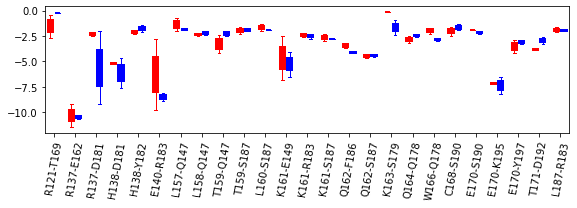

In [22]:
pairs,e_vals,_,_,_,_ = files_processing([il2HAR_BG_r0_gb2, 
                                         il2HAR_BG_r1_gb2, 
                                         il2IAR_BG_r0_gb2,
                                         il2IAR_BG_r1_gb2], -2.0, 205, 5, 31)
# np.transpose([pairs,e_vals[:,0],e_vals[:,1], e_vals[:,2],e_vals[:,3]])
plot_comps( to_array(e_vals[:,0:2]), to_array(e_vals[:,2:]), pairs, 'beta-gamma_gb2_pair_wise')

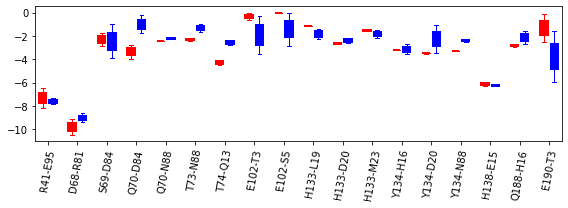

In [23]:
pairs,e_vals,_,_,_,_ = files_processing([il2HAR_IL2B_r0_gb2, 
                                         il2HAR_IL2B_r1_gb2, 
                                         il2IAR_IL2B_r0_gb2,
                                         il2IAR_IL2B_r1_gb2], -2.0, 205, 5, 2)
# np.transpose([pairs,e_vals[:,0],e_vals[:,1], e_vals[:,2],e_vals[:,3]])
plot_comps( to_array(e_vals[:,0:2]), to_array(e_vals[:,2:]), pairs, 'il2-beta_gb2_pair_wise')

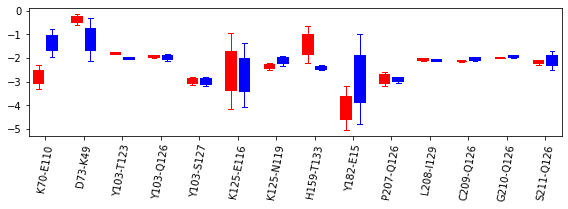

In [24]:
pairs,e_vals,_,_,_,_ = files_processing([il2HAR_IL2G_r0_gb2, 
                                         il2HAR_IL2G_r1_gb2, 
                                         il2IAR_IL2G_r0_gb2,
                                         il2IAR_IL2G_r1_gb2], -2.0, 196, 31, 2)
# np.transpose([pairs,e_vals[:,0],e_vals[:,1], e_vals[:,2],e_vals[:,3]])
plot_comps( to_array(e_vals[:,0:2]), to_array(e_vals[:,2:]), pairs, 'il2-gamma_gb2_pair_wise')

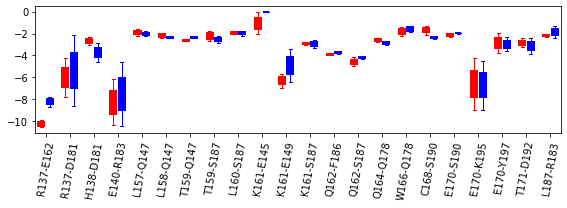

In [28]:
pairs,e_vals,_,_,_,_ = files_processing([il15HAR_BG_r0_gb2, 
                                         il15HAR_BG_r1_gb2, 
                                         il15IAR_BG_r0_gb2,
                                         il15IAR_BG_r1_gb2], -2.0, 203, 5, 31)
# np.transpose([pairs,e_vals[:,0],e_vals[:,1], e_vals[:,2],e_vals[:,3]])
plot_comps( to_array(e_vals[:,0:2]), to_array(e_vals[:,2:]), pairs, 'beta-gamma_il15_gb2_pair_wise')

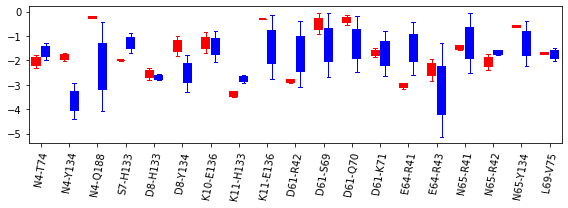

In [26]:
pairs,e_vals,_,_,_,_ = files_processing([il15HAR_IL15B_r0_gb2, 
                                         il15HAR_IL15B_r1_gb2, 
                                         il15IAR_IL15B_r0_gb2,
                                         il15IAR_IL15B_r1_gb2], -2.0, 115, -2, 5)
# np.transpose([pairs,e_vals[:,0],e_vals[:,1], e_vals[:,2],e_vals[:,3]])
plot_comps( to_array(e_vals[:,0:2]), to_array(e_vals[:,2:]), pairs, 'il15-beta_gb2_pair_wise')

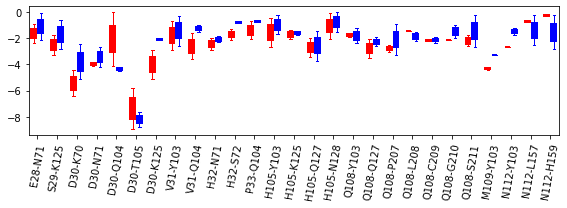

In [27]:
pairs,e_vals,_,_,_,_ = files_processing([il15HAR_IL15G_r0_gb2, 
                                         il15HAR_IL15G_r1_gb2, 
                                         il15IAR_IL15G_r0_gb2,
                                         il15IAR_IL15G_r1_gb2], -2.0, 115, -2, 31)
# np.transpose([pairs,e_vals[:,0],e_vals[:,1], e_vals[:,2],e_vals[:,3]])
plot_comps( to_array(e_vals[:,0:2]), to_array(e_vals[:,2:]), pairs, 'il15-gamma_gb2_pair_wise')